# Import Library

In [2]:
import numpy as np
import pandas as pd

# ADF (uji stasioneritas data time series)
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt

# Forecasting data time series yang mengandung tren
from statsmodels.tsa.arima.model import ARIMA

# Forecasting data time series yang mengandung tren dan musiman
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# MAPE untuk evaluasi model forecasting
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Save/load model ke file .pkl agar tidak perlu latih ulang
import joblib

In [14]:
# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Preprocessing

In [3]:
df_1 = pd.read_csv("sales_data_january_2019.csv")
df_2 = pd.read_csv("sales_data_february_2019.csv")
df_3 = pd.read_csv("sales_data_march_2019.csv")
df_4 = pd.read_csv("sales_data_april_2019.csv")
df_5 = pd.read_csv("sales_data_may_2019.csv")
df_6 = pd.read_csv("sales_data_june_2019.csv")
df_7 = pd.read_csv("sales_data_july_2019.csv")
df_8 = pd.read_csv("sales_data_august_2019.csv")
df_9 = pd.read_csv("sales_data_september_2019.csv")
df_10 = pd.read_csv("sales_data_october_2019.csv")
df_11 = pd.read_csv("sales_data_november_2019.csv")
df_12 = pd.read_csv("sales_data_december_2019.csv")

In [4]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12], ignore_index=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [10]:
# Correct data types
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

/tmp/ipython-input-10-787557850.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 8.6+ MB


## Check missing values

In [12]:
df.isna().sum()

,0
Order ID,545
Product,545
Quantity Ordered,900
Price Each,900
Order Date,900
Purchase Address,545


In [15]:
df[df['Price Each'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaT,NaN
678,NaN,NaN,NaN,NaN,NaT,NaN
797,NaN,NaN,NaN,NaN,NaT,NaN
876,NaN,NaN,NaN,NaN,NaT,NaN
1073,Order ID,Product,NaN,NaN,NaT,Purchase Address
1102,Order ID,Product,NaN,NaN,NaT,Purchase Address
1194,Order ID,Product,NaN,NaN,NaT,Purchase Address
1299,NaN,NaN,NaN,NaN,NaT,NaN
1491,NaN,NaN,NaN,NaN,NaT,NaN
1699,NaN,NaN,NaN,NaN,NaT,NaN


In [16]:
# Drop missing rows
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


# EDA

In [27]:
# Add revenue column
df_clean['Revenue'] = df_clean['Quantity Ordered'] * df_clean['Price Each']
df_clean.head()

/tmp/ipython-input-27-874375683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Revenue'] = df_clean['Quantity Ordered'] * df_clean['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99


## Calculate the total revenue, number of orders, and total quantity of items sold throughout the year 2019. In addition, calculate the average number of items purchased per transaction and the average spending per transaction.

In [56]:
# Calculate total revenue
total_revenue = df_clean['Revenue'].sum()

# Calculate total number of orders (unique Order IDs)
total_orders = df_clean['Order ID'].nunique()

# Calculate total quantity ordered
total_quantity_ordered = df_clean['Quantity Ordered'].sum()

# Calculate average quantity per transaction
average_quantity_per_transaction = total_quantity_ordered / total_orders

# Calculate average spending per transaction
average_spending_per_transaction = total_revenue / total_orders

print(f"Total Revenue (2019): ${total_revenue:,.2f}")
print(f"Total Number of Orders (2019): {total_orders:,}")
print(f"Total Quantity Ordered (2019): {total_quantity_ordered:,}")
print(f"Average Quantity per Transaction (2019): {average_quantity_per_transaction:.2f}")
print(f"Average Spending per Transaction (2019): ${average_spending_per_transaction:,.2f}")

Total Revenue (2019): $34,492,035.97
Total Number of Orders (2019): 178,437
Total Quantity Ordered (2019): 209,079.0
Average Quantity per Transaction (2019): 1.17
Average Spending per Transaction (2019): $193.30


## Calculate the number of orders and GMV (Gross Merchandise Value) within the following time ranges: daily, weekly, and monthly. Note: GMV is calculated based on the total spending made by customers, taking into account all costs and discounts paid by the customer.

In [57]:
# Calculate daily orders and GMV
daily_summary = df_clean.groupby(df_clean['Order Date'].dt.date).agg(
    Total_Orders=('Order ID', 'nunique'),
    Total_GMV=('Revenue', 'sum')
).reset_index()
daily_summary['Order Date'] = pd.to_datetime(daily_summary['Order Date'])
daily_summary.sort_values('Total_GMV').head()

,Order Date,Total_Orders,Total_GMV
0,2019-01-01,287,65681.94
1,2019-01-02,308,70813.20
2,2019-01-03,286,47046.20
3,2019-01-04,282,62012.21
4,2019-01-05,301,46524.63


In [58]:
# Calculate weekly orders and GMV
weekly_summary = df_clean.groupby(df_clean['Order Date'].dt.isocalendar().week).agg(
    Total_Orders=('Order ID', 'nunique'),
    Total_GMV=('Revenue', 'sum')
).reset_index()
weekly_summary.rename(columns={'week': 'Week'}, inplace=True)
weekly_summary.head()

,Week,Total_Orders,Total_GMV
0,1,3290,637300.07
1,2,2104,409428.28
2,3,2104,394936.90
3,4,2134,426632.16
4,5,2381,460355.55


In [59]:
# Calculate monthly orders and GMV
monthly_summary = df_clean.groupby(df_clean['Order Date'].dt.month).agg(
    Total_Orders=('Order ID', 'nunique'),
    Total_GMV=('Revenue', 'sum')
).reset_index()
monthly_summary.rename(columns={'Order Date': 'Month'}, inplace=True)
monthly_summary.head()

,Month,Total_Orders,Total_GMV
0,1,9293,1822256.73
1,2,11496,2202022.42
2,3,14549,2807100.38
3,4,17528,3390670.24
4,5,15836,3152606.75


## The marketing team wants to identify which products have been purchased most frequently over the past year. They plan to create bundles using these top products to increase sales. Identify the top 10 products that generated the highest revenue in the last three months, and determine which products can be bundled together based on the analysis results.

In [65]:
df_last_3_months = df_clean[df_clean['Order Date'].dt.month.isin([10, 11, 12])]
df_last_3_months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue
112515,248643,Lightning Charging Cable,1.0,14.95,2019-10-01 01:36:00,"321 Chestnut St, Austin, TX 73301",14.95
114081,250139,Google Phone,1.0,600.00,2019-10-01 00:53:00,"132 10th St, San Francisco, CA 94016",600.00
114082,250139,USB-C Charging Cable,1.0,11.95,2019-10-01 00:53:00,"132 10th St, San Francisco, CA 94016",11.95
114224,250275,ThinkPad Laptop,1.0,999.99,2019-10-01 00:46:00,"814 7th St, San Francisco, CA 94016",999.99
114648,250684,AAA Batteries (4-pack),1.0,2.99,2019-10-01 03:38:00,"985 Pine St, San Francisco, CA 94016",2.99


In [69]:
# Calculate total revenue each product
product_revenue_last_3_months = df_last_3_months.groupby('Product')['Revenue'].sum()
product_revenue_last_3_months.head()

,Revenue
Product,
20in Monitor,155965.82
27in 4K Gaming Monitor,843158.38
27in FHD Monitor,370775.28
34in Ultrawide Monitor,786959.29
AA Batteries (4-pack),35669.76


In [70]:
# Identify top 10 products by revenue
top_10_products_revenue = product_revenue_last_3_months.sort_values(ascending=False).head(10)
display(top_10_products_revenue)

,Revenue
Product,
Macbook Pro Laptop,2733600.00
iPhone,1600900.00
ThinkPad Laptop,1373986.26
Google Phone,1083000.00
27in 4K Gaming Monitor,843158.38
Apple Airpods Headphones,789000.00
34in Ultrawide Monitor,786959.29
Flatscreen TV,495000.00
Bose SoundSport Headphones,454054.59


Macbook Pro Laptop, iPhone, ThinkPad Laptop, and Google Phone have total revenue of above 1 million within the last three months.

In [71]:
# Find other products that are often purchased in the same order with top 10 products
df_top_orders = df_last_3_months[df_last_3_months['Product'].isin(top_10_products_revenue.index)]

# Group by Order ID and aggregate products into a list
orders_with_top_products = df_top_orders.groupby('Order ID')['Product'].apply(list).reset_index()

# Find product pairs within each order
from collections import Counter

pair_counts = Counter()
for product_list in orders_with_top_products['Product']:
    for i in range(len(product_list)):
        for j in range(i + 1, len(product_list)):
            pair = tuple(sorted((product_list[i], product_list[j])))
            pair_counts[pair] += 1

# Identify the most frequent product pairs
most_common_pairs = pair_counts.most_common(10)

print("Top 10 most frequent product bundles:")
for pair, count in most_common_pairs:
    print(f"{pair}: {count}")

Top 10 most frequent product bundles:
('Apple Airpods Headphones', 'iPhone'): 132
('Bose SoundSport Headphones', 'Google Phone'): 81
('Apple Airpods Headphones', 'Bose SoundSport Headphones'): 16
('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 10
('27in FHD Monitor', 'Apple Airpods Headphones'): 10
('34in Ultrawide Monitor', 'Bose SoundSport Headphones'): 8
('27in FHD Monitor', 'Bose SoundSport Headphones'): 8
('Apple Airpods Headphones', 'Apple Airpods Headphones'): 8
('27in 4K Gaming Monitor', 'Bose SoundSport Headphones'): 7
('Apple Airpods Headphones', 'Google Phone'): 7


In [73]:
# Suggest bundling options
print("\nSuggested Product Bundles:")

# Bundle 1: Apple Audio Bundle
bundle_1_products = ['Apple Airpods Headphones', 'iPhone']
bundle_1_rationale = f"The most frequent pair is {most_common_pairs[0][0]} with a count of {most_common_pairs[0][1]}. This suggests that customers buying iPhones often also buy Apple Airpods, making a bundle of these two products a strong option."
print(f"\nBundle 1: Apple Audio Bundle ({', '.join(bundle_1_products)})")
print(f"Rationale: {bundle_1_rationale}")

# Bundle 2: Google Phone and Audio Bundle
bundle_2_products = ['Bose SoundSport Headphones', 'Google Phone']
bundle_2_rationale = f"Another highly frequent pair is {most_common_pairs[1][0]} with a count of {most_common_pairs[1][1]} highlights that customers purchasing Google Phones frequently need a high-quality headphones, making this a practical and popular bundle."
print(f"\nBundle 2: Google Phone and Audio Bundle ({', '.join(bundle_2_products)})")
print(f"Rationale: {bundle_2_rationale}")

# Bundle 3: Premium Audio Bundle
bundle_3_products = ['Apple Airpods Headphones', 'Bose SoundSport Headphones']
bundle_3_rationale = f"The pair {most_common_pairs[2][0]} with a count of {most_common_pairs[2][1]}. This indicates a demand for high-quality headphones."
print(f"\nBundle 3: Premium Audio Bundle ({', '.join(bundle_3_products)})")
print(f"Rationale: {bundle_3_rationale}")

# Bundle 4: Monitor and Headphone Bundle
bundle_4_products = ['27in FHD Monitor', 'Apple Airpods Headphones']
bundle_4_rationale = f"The pair {most_common_pairs[4][0]} with a count of {most_common_pairs[4][1]} suggests that customers buying a 27in FHD Monitor often purchase Apple Airpods Headphones, indicating a potential bundle for a basic computer setup."
print(f"\nBundle 4: Monitor and Headphone Bundle ({', '.join(bundle_4_products)})")
print(f"Rationale: {bundle_4_rationale}")

# Bundle 5: Gaming Monitor and Headphone Bundle
bundle_5_products = ['27in 4K Gaming Monitor', 'Bose SoundSport Headphones']
bundle_5_rationale = f"Similarly, the pair {most_common_pairs[8][0]} with a count of {most_common_pairs[8][1]} shows that customers buying a 27in 4K Gaming Monitor also frequently purchase Bose SoundSport Headphones, suggesting a bundle targeting gamers."
print(f"\nBundle 5: Gaming Monitor and Headphone Bundle ({', '.join(bundle_5_products)})")
print(f"Rationale: {bundle_5_rationale}")


Suggested Product Bundles:

Bundle 1: Apple Audio Bundle (Apple Airpods Headphones, iPhone)
Rationale: The most frequent pair is ('Apple Airpods Headphones', 'iPhone') with a count of 132. This suggests that customers buying iPhones often also buy Apple Airpods, making a bundle of these two products a strong option.

Bundle 2: Google Phone and Audio Bundle (Bose SoundSport Headphones, Google Phone)
Rationale: Another highly frequent pair is ('Bose SoundSport Headphones', 'Google Phone') with a count of 81 highlights that customers purchasing Google Phones frequently need a high-quality headphones, making this a practical and popular bundle.

Bundle 3: Premium Audio Bundle (Apple Airpods Headphones, Bose SoundSport Headphones)
Rationale: The pair ('Apple Airpods Headphones', 'Bose SoundSport Headphones') with a count of 16. This indicates a demand for high-quality headphones.

Bundle 4: Monitor and Headphone Bundle (27in FHD Monitor, Apple Airpods Headphones)
Rationale: The pair ('27in

## Identify the top 5 cities with the highest number of orders, as well as the 5 cities with the highest total and average spending.

In [74]:
# Extract city from 'Purchase Address'
def get_city(address):
    return address.split(',')[1].strip()

df_clean['City'] = df_clean['Purchase Address'].apply(get_city)

# Calculate total orders, total spending, and average spending by city
city_summary = df_clean.groupby('City').agg(
    Total_Orders=('Order ID', 'nunique'),
    Total_Spending=('Revenue', 'sum'),
    Average_Spending=('Revenue', 'mean')
).reset_index()

/tmp/ipython-input-74-1973145320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['City'] = df_clean['Purchase Address'].apply(get_city)


In [75]:
# Identify top 5 cities by total orders
top_5_cities_orders = city_summary.sort_values(by='Total_Orders', ascending=False).head(5)
top_5_cities_orders

,City,Total_Orders,Total_Spending,Average_Spending
7,San Francisco,42898,8262203.91,184.704550
4,Los Angeles,28498,5452570.80,184.177362
5,New York City,23848,4664317.43,187.502711
2,Boston,19092,3661642.01,183.688272
0,Atlanta,14253,2795498.58,187.856903


In [76]:
# Identify top 5 cities by total spending
top_5_cities_total_spending = city_summary.sort_values(by='Total_Spending', ascending=False).head(5)
top_5_cities_total_spending

,City,Total_Orders,Total_Spending,Average_Spending
7,San Francisco,42898,8262203.91,184.704550
4,Los Angeles,28498,5452570.80,184.177362
5,New York City,23848,4664317.43,187.502711
2,Boston,19092,3661642.01,183.688272
0,Atlanta,14253,2795498.58,187.856903


In [77]:
# Identify top 5 cities by average spending
top_5_cities_average_spending = city_summary.sort_values(by='Average_Spending', ascending=False).head(5)
top_5_cities_average_spending

,City,Total_Orders,Total_Spending,Average_Spending
0,Atlanta,14253,2795498.58,187.856903
5,New York City,23848,4664317.43,187.502711
3,Dallas,14240,2767975.40,186.772969
8,Seattle,14119,2747755.48,186.516120
6,Portland,11980,2320490.61,186.160498


San Francisco, Los Angeles, New York City, Boston, and Atlanta are the cities with the highest number of orders and total spending. Atlanta and New York City also rank among the cities with the highest average spending. Other cities with high average spending include Dallas, Seattle, and Portland.

## The marketing team wants to identify when sales peak so they can design an effective marketing strategy. Analyze the time range during which sales are most active (rush hours).

/tmp/ipython-input-79-830841491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Hour'] = df_clean['Order Date'].dt.hour


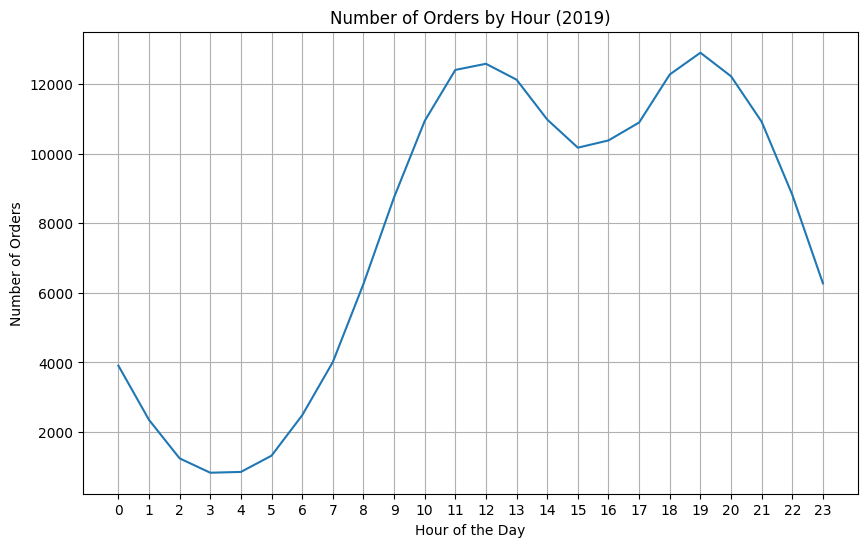

In [79]:
# Extract the hour from the Order Date
df_clean['Hour'] = df_clean['Order Date'].dt.hour

# Group by hour and count the number of orders
hourly_orders = df_clean.groupby('Hour')['Order ID'].count().reset_index()

# Plot the number of orders by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_orders['Hour'], hourly_orders['Order ID'])
plt.xticks(hourly_orders['Hour'])
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour (2019)')
plt.grid(True)
plt.show()

The peak hours are around 12:00 PM and 19:00 PM.

## Identify trends

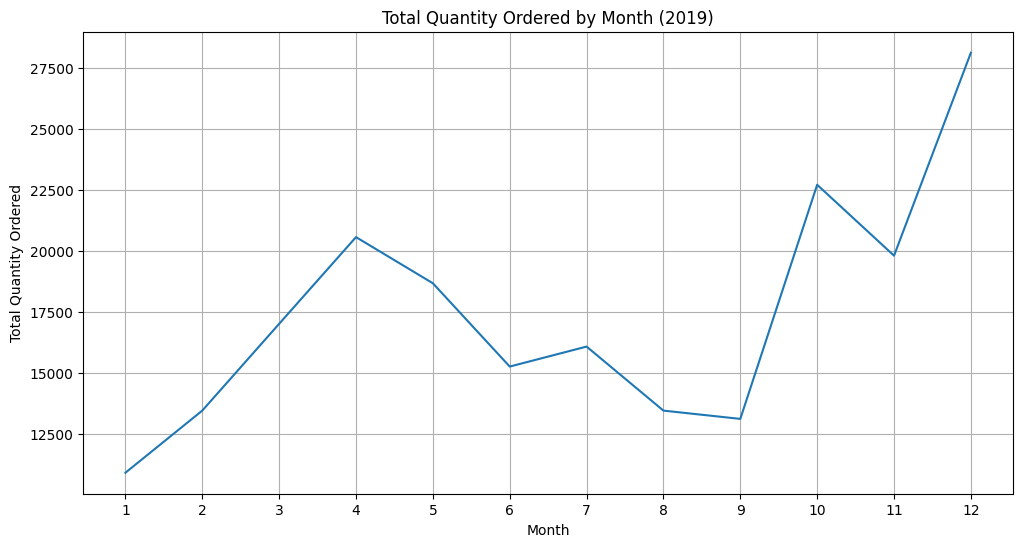

In [38]:
# Group by month and sum the 'Quantity Ordered'
monthly_sales = df_clean.groupby(df_clean['Order Date'].dt.month)['Quantity Ordered'].sum()

# Line plot monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Quantity Ordered by Month (2019)')
plt.xticks(monthly_sales.index)
plt.grid(True)
plt.show()

There are months with high revenue—April, and from October to December. This may be due to seasonal promotions and increased customer demand.

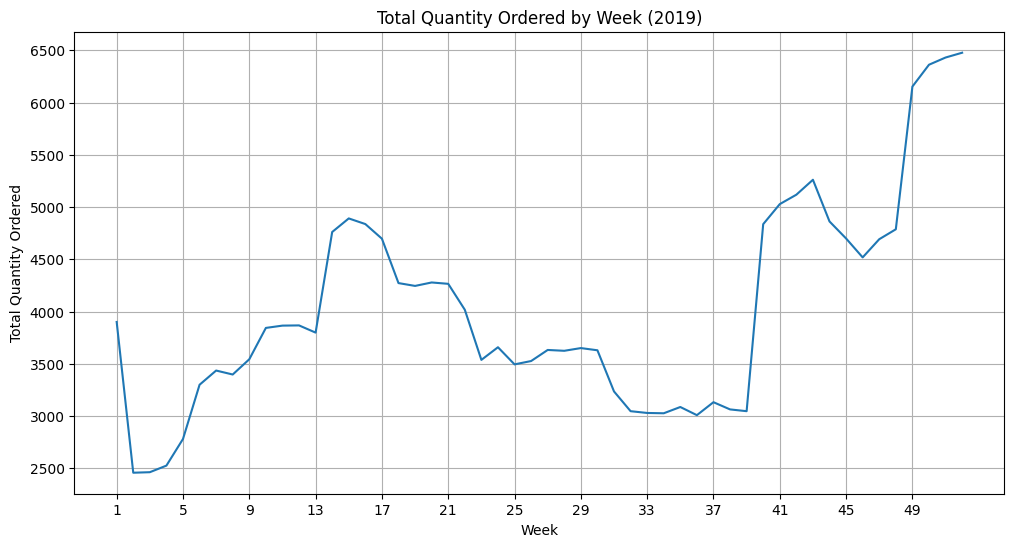

In [39]:
# Group by week and sum the 'Quantity Ordered'
weekly_sales = df_clean.groupby(df_clean['Order Date'].dt.isocalendar().week)['Quantity Ordered'].sum()

# Line plot weekly sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values)
plt.xlabel('Week')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Quantity Ordered by Week (2019)')
plt.xticks(weekly_sales.index[::4]) # Show ticks every 4 weeks for readability
plt.grid(True)
plt.show()

The data is not stationary.

## Extract daily revenue

In [31]:
# Extract only the date
daily_revenue = df_clean.groupby(df_clean['Order Date'].dt.date)['Revenue'].sum().reset_index()

# Rename the column
daily_revenue.columns = ['Date', 'Total_Revenue']

# Convert to datetime
daily_revenue['Date'] = pd.to_datetime(daily_revenue['Date'])

daily_revenue.head()

,Date,Total_Revenue
0,2019-01-01,65681.94
1,2019-01-02,70813.20
2,2019-01-03,47046.20
3,2019-01-04,62012.21
4,2019-01-05,46524.63


In [42]:
ts_revenue = daily_revenue.set_index('Date')['Total_Revenue']
ts_revenue.head()

,Total_Revenue
Date,
2019-01-01,65681.94
2019-01-02,70813.20
2019-01-03,47046.20
2019-01-04,62012.21
2019-01-05,46524.63


### Check data stationary

In [44]:
# Calculate ADF statistic
adf_revenue_result = adfuller(ts_revenue)
print(f'ADF Statistic: {adf_revenue_result[0]}')
print(f'p-value: {adf_revenue_result[1]}')

ADF Statistic: -2.3508591590746564
p-value: 0.1560888501412367


P-value > 0.05; therefore, a log transformation is used to reduce high volatility.

In [46]:
ts_revenue_log = np.log(ts_revenue)

# Apply differencing to remove the trend and make the data stationary.
ts_revenue_log_diff = ts_revenue_log.diff().dropna()

In [51]:
# Recalculate ADF statistic
adf_revenue_result_2 = adfuller(ts_revenue_log_diff)
print(f'ADF Statistic: {adf_revenue_result_2[0]}')
print(f'p-value: {adf_revenue_result_2[1]}')

ADF Statistic: -9.433322671417482
p-value: 5.12035581943102e-16


P-value < 0.05

## Extract daily visitor

In [40]:
# Extract only the date
daily_visitor = df_clean.groupby(df_clean['Order Date'].dt.date)['Order ID'].count().reset_index()

# Rename the column
daily_visitor.columns = ['Date', 'Total_Visitor']

# Convert to datetime
daily_visitor['Date'] = pd.to_datetime(daily_visitor['Date'])

daily_visitor.head()

,Date,Total_Visitor
0,2019-01-01,302
1,2019-01-02,324
2,2019-01-03,296
3,2019-01-04,294
4,2019-01-05,308


In [43]:
ts_visitor = daily_visitor.set_index('Date')['Total_Visitor']
ts_visitor.head()

,Total_Visitor
Date,
2019-01-01,302
2019-01-02,324
2019-01-03,296
2019-01-04,294
2019-01-05,308


### Check data stationary

In [45]:
# Calculate ADF statistic
adf_visitor_result = adfuller(ts_visitor)
print(f'ADF Statistic: {adf_visitor_result[0]}')
print(f'p-value: {adf_visitor_result[1]}')

ADF Statistic: -2.740059176386131
p-value: 0.06735907786132521


P-value > 0.05; therefore, a log transformation is used to reduce high volatility.

In [53]:
ts_visitor_log = np.log(ts_visitor)

# Apply differencing to remove the trend and make the data stationary.
ts_visitor_log_diff = ts_visitor_log.diff().dropna()

In [54]:
# Recalculate ADF statistic
adf_visitor_result_2 = adfuller(ts_visitor_log_diff)
print(f'ADF Statistic: {adf_visitor_result_2[0]}')
print(f'p-value: {adf_visitor_result_2[1]}')

ADF Statistic: -11.898763217068678
p-value: 5.6399343676120625e-22


P-value < 0.05

# Forecasting

## Split the data

In [109]:
# Revenue
train_revenue = ts_revenue_log[:'2019-06-30']
test_revenue = ts_revenue_log['2019-07-01':]

# Visitor
train_visitor = ts_visitor_log[:'2019-06-30']
test_visitor = ts_visitor_log['2019-07-01':]

## Build a forecasting model using the methods taught in the course to predict the number of visitors and transactions for the next month, using daily data. You are required to create at least two different models and then select the best one based on the lowest MAPE (Mean Absolute Percentage Error). Provide recommendations for the business team based on your forecasting results and analysis.

In [81]:
# arima and ets for 30 days
steps_ahead = 30

### Revenue

In [110]:
# ARIMA Revenue
model_arima_revenue = ARIMA(np.log(train_revenue), order=(1, 1, 1)).fit()

# forecast
forecast_arima_log_revenue = model_arima_revenue.forecast(steps=steps_ahead)

# convert the result
forecast_arima_revenue = np.exp(forecast_arima_log_revenue)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [111]:
# ETS Revenue
model_ets_revenue = ExponentialSmoothing(train_revenue, trend='add', seasonal='add', seasonal_periods=7).fit()

# forecast
forecast_ets_revenue = model_ets_revenue.forecast(steps=steps_ahead)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [112]:
# Select the first 30 days of the test set for evaluation
test_revenue_30 = test_revenue[:steps_ahead]

mape_arima_revenue = mean_absolute_percentage_error(test_revenue_30, forecast_arima_revenue)

mape_ets_revenue = mean_absolute_percentage_error(test_revenue_30, forecast_ets_revenue)

print(f'MAPE ARIMA Revenue: {mape_arima_revenue:.2%}')
print(f'MAPE ETS Revenue: {mape_ets_revenue:.2%}')

MAPE ARIMA Revenue: 0.81%
MAPE ETS Revenue: 0.94%


A MAPE below 10% is considered accurate. ARIMA is the best-performing model.

In [128]:
# Turn series into dataframe
forecast_july_df_revenue = np.exp(forecast_arima_revenue).to_frame().reset_index()

forecast_july_df_revenue.columns = ['Date', 'Forecasted_Revenue']
forecast_july_df_revenue.head()

,Date,Forecasted_Revenue
0,2019-07-01,85577.619737
1,2019-07-02,85366.220092
2,2019-07-03,85390.208832
3,2019-07-04,85387.483072
4,2019-07-05,85387.792745


In [129]:
# Display actual data
np.exp(test_revenue_30).head()

,Total_Revenue
Date,
2019-07-01,89500.91
2019-07-02,76026.20
2019-07-03,93628.00
2019-07-04,102134.73
2019-07-05,72285.70


### Visitor

In [124]:
# ARIMA Visitor
model_arima_visitor = ARIMA(np.log(train_visitor), order=(1, 1, 1)).fit()

# forecast
forecast_arima_log_visitor = model_arima_visitor.forecast(steps=steps_ahead)

# convert the result
forecast_arima_visitor = np.exp(forecast_arima_log_visitor)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [125]:
# ETS Visitor
model_ets_visitor = ExponentialSmoothing(train_visitor, trend='add', seasonal='add', seasonal_periods=7).fit()

# forecast
forecast_ets_visitor = model_ets_visitor.forecast(steps=steps_ahead)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [126]:
# Select the first 30 days of the test set for evaluation
test_visitor_30 = test_visitor[:steps_ahead]

mape_arima_visitor = mean_absolute_percentage_error(test_visitor_30, forecast_arima_visitor)

mape_ets_visitor = mean_absolute_percentage_error(test_visitor_30, forecast_ets_visitor)

print(f'MAPE ARIMA Visitor: {mape_arima_visitor:.2%}')
print(f'MAPE ETS Visitor: {mape_ets_visitor:.2%}')

MAPE ARIMA Visitor: 0.65%
MAPE ETS Visitor: 0.72%


A MAPE below 10% is considered accurate. ARIMA is the best-performing model.

In [133]:
# Turn series into dataframe
forecast_july_df_visitor = np.exp(forecast_arima_visitor).to_frame().reset_index()

forecast_july_df_visitor.columns = ['Date', 'Forecasted_Revenue']
forecast_july_df_visitor.head()

,Date,Forecasted_Revenue
0,2019-07-01,457.495404
1,2019-07-02,457.034186
2,2019-07-03,457.054183
3,2019-07-04,457.053315
4,2019-07-05,457.053353


In [134]:
# Display actual data
np.exp(test_visitor_30).head()

,Total_Visitor
Date,
2019-07-01,476.0
2019-07-02,467.0
2019-07-03,467.0
2019-07-04,459.0
2019-07-05,452.0


# Business Insights & Recommendations

**Customer Behavior**

Most transactions involve only 1–2 items, with an average spend of ~$193 per order — indicating preference for high-ticket, low-volume purchases.

Products like laptops and phones dominate revenue, while accessories such as AirPods and headphones often appear in bundles.

**Sales Trends**

Revenue and orders consistently grow month-over-month, peaking around Q4 — suggestive of strong seasonal demand.

Sales surge daily at 12:00 PM and 7:00 PM, ideal windows for flash deals or ad targeting.

**Product Strategy**

Bundle top accessories with flagship devices (e.g., AirPods with iPhones, Bose Headphones with Google Phones) to increase basket size and cross-selling.

Monitor bundle popularity for optimization and variation across customer segments.

Suggested Product Bundles:

Bundle 1: Apple Audio Bundle (Apple Airpods Headphones, iPhone)
Rationale: The most frequent pair is ('Apple Airpods Headphones', 'iPhone') with a count of 132. This suggests that customers buying iPhones often also buy Apple Airpods, making a bundle of these two products a strong option.

Bundle 2: Google Phone and Audio Bundle (Bose SoundSport Headphones, Google Phone)
Rationale: Another highly frequent pair is ('Bose SoundSport Headphones', 'Google Phone') with a count of 81 highlights that customers purchasing Google Phones frequently need a high-quality headphones, making this a practical and popular bundle.

Bundle 3: Premium Audio Bundle (Apple Airpods Headphones, Bose SoundSport Headphones)
Rationale: The pair ('Apple Airpods Headphones', 'Bose SoundSport Headphones') with a count of 16. This indicates a demand for high-quality headphones.

Bundle 4: Monitor and Headphone Bundle (27in FHD Monitor, Apple Airpods Headphones)
Rationale: The pair ('27in FHD Monitor', 'Apple Airpods Headphones') with a count of 10 suggests that customers buying a 27in FHD Monitor often purchase Apple Airpods Headphones, indicating a potential bundle for a basic computer setup.

Bundle 5: Gaming Monitor and Headphone Bundle (27in 4K Gaming Monitor, Bose SoundSport Headphones)
Rationale: Similarly, the pair ('27in 4K Gaming Monitor', 'Bose SoundSport Headphones') with a count of 7 shows that customers buying a 27in 4K Gaming Monitor also frequently purchase Bose SoundSport Headphones, suggesting a bundle targeting gamers.

**Regional Targeting**

San Francisco, LA, NYC, Boston, and Atlanta are priority markets due to high order volume and spending.

For premium upselling, focus on Atlanta, NYC, Dallas, and Seattle — cities with strong average spend.

**Forecast Accuracy**

ARIMA models outperform ETS (lower MAPE) in predicting both visitor flow and revenue, especially useful for short-term business planning.

Use ARIMA for operational decisions, staffing, and inventory prep in the coming month.

# Link Github